# Exploratory Data Analysis

Regression on Mohs Hardness

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_csv('Raw_data/train.csv')
raw.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [3]:
raw.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [5]:
df = raw.drop('id',axis=1)

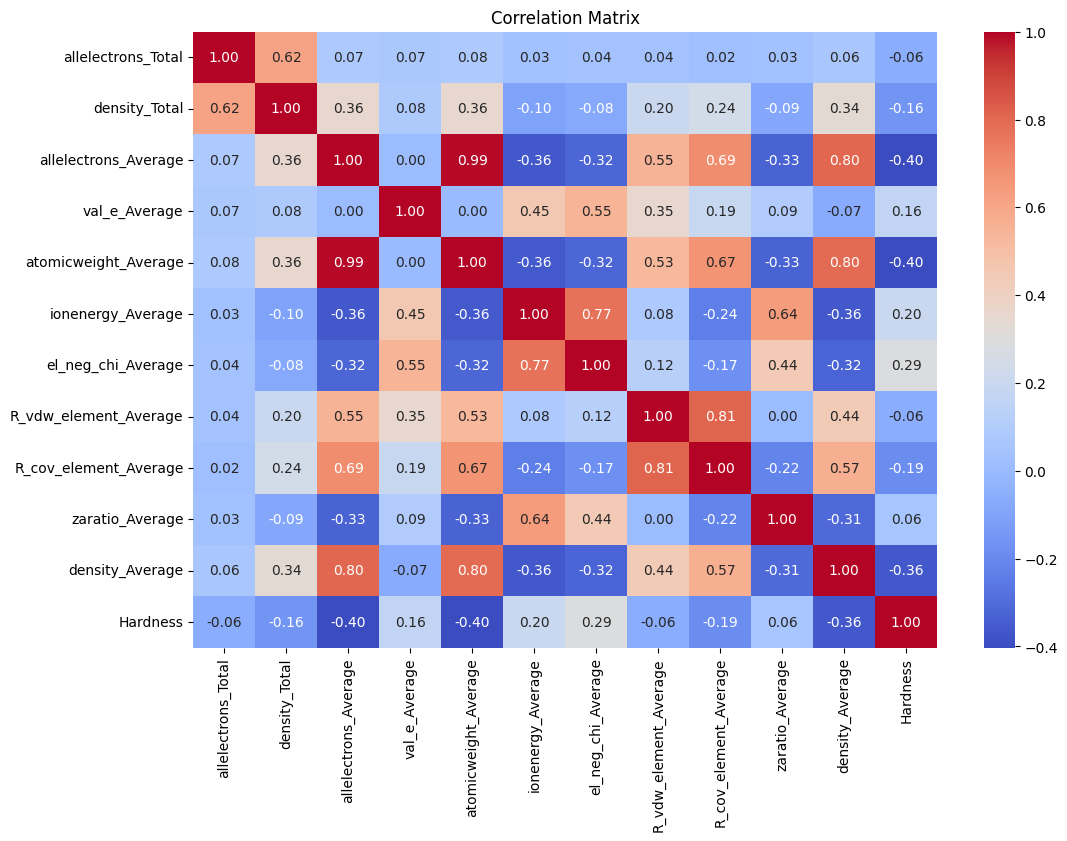

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Attributes to select

Positive Correlation
- val_e_average
- ionenergy_Average
- el_neg_chi_Average

Negative Correlation
- allenectrons_Average
- atomicweight_Average
- density_Average

In [15]:
columns_to_keep = ['id', 'allelectrons_Average', 'density_Average', 'val_e_Average', 'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average', 'Hardness']

df_selected = raw[columns_to_keep]

df_selected.head()

,id,allelectrons_Average,density_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,Hardness
0,0,10.0,0.91457,4.8,20.612526,11.08810,2.766,6.0
1,1,10.0,0.71760,4.8,20.298893,12.04083,2.755,6.5
2,2,15.6,1.50633,5.6,33.739258,12.08630,2.828,2.5
3,3,10.0,0.78937,4.8,20.213349,10.94850,2.648,6.0
4,4,11.6,1.86481,4.8,24.988133,11.82448,2.766,6.0


In [16]:
df_selected.describe()

,id,allelectrons_Average,density_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,17.033222,2.132984,4.546789,37.507703,10.938308,2.607662,4.647126
std,3004.38646,10.468734,1.936656,0.690864,26.012313,1.408276,0.334906,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,10.000000,0.814800,4.000000,20.298893,10.590660,2.530000,3.000000
50%,5203.00000,12.600000,1.351550,4.714286,26.203827,11.202760,2.706000,5.500000
75%,7804.50000,22.000000,2.741550,4.800000,48.719500,11.670725,2.805000,6.000000
max,10406.00000,67.000000,10.970000,6.000000,167.400000,15.245810,3.443000,10.000000


### Data Normalizing
We are converting the data into 0 to 1

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ["allelectrons_Average","density_Average","val_e_Average","atomicweight_Average","ionenergy_Average","el_neg_chi_Average","Hardness"]
data = df_selected[["allelectrons_Average","density_Average","val_e_Average","atomicweight_Average","ionenergy_Average","el_neg_chi_Average","Hardness"]]
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=columns)

In [27]:
scaled_data.head()

,allelectrons_Average,density_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,Hardness
0,0.149254,0.083370,0.800000,0.123133,0.727288,0.803369,0.555556
1,0.149254,0.065415,0.800000,0.121260,0.789780,0.800174,0.611111
2,0.232836,0.137314,0.933333,0.201549,0.792762,0.821377,0.166667
3,0.149254,0.071957,0.800000,0.120749,0.718132,0.769097,0.555556
4,0.173134,0.169992,0.800000,0.149272,0.775589,0.803369,0.555556


In [28]:
scaled_data.to_csv('scaled_data.csv', index=False)